# PREGUNTA 4

## Configuración de las Rutas de Importación

Se añade el directorio padre (..) al path (sys.path), lo que permite al entorno de Python acceder a módulos o paquetes ubicados en directorios superiores al actual. Esto es útil para poder importar scripts o paquetes personalizados sin tener que mover ficheros o el directorio de trabajo.

In [1]:
import sys
sys.path.insert(0, '..')

## Verificación de las Versiones de los Paquetes

Se utiliza la función check_packages() para verificar que los paquetes y sus respectivas versiones indicadas en el diccionario 'd' estén instalados correctamente dentro del entorno. Este paso es importante para verificar la compatibilidad de cada paquete para poder evitar errores por diferencia de versión.

In [2]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'mlxtend' : '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] Your Python version is 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
[OK] numpy 1.24.3
[OK] scipy 1.8.0
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


## Importación de Paquetes

Se importan los paquetes esenciales para analizar y visualizar datos: numpy para cálculos numéricos, pandas para manipular datos y matplotlib.pyplot para visualizar gráficos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

In [4]:
columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Target']
df = pd.read_csv("dataset_regression.csv", 
                 sep=',',
                 usecols=columns)
pd.set_option('display.max_columns', len(df.columns))
df.columns
df.shape
df.head(1)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1030 non-null   float64
 1   Col2    1030 non-null   float64
 2   Col3    1030 non-null   float64
 3   Col4    1030 non-null   int64  
 4   Col5    1030 non-null   float64
 5   Col6    1030 non-null   float64
 6   Col7    1030 non-null   float64
 7   Col8    1030 non-null   float64
 8   Target  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,73.895825,6.204660,54.188350,45.662136,181.567282,773.580485,972.918932,281.167864,35.817961
std,86.279342,5.973841,63.997004,63.169912,21.354219,80.175980,77.753954,104.506364,16.705742
min,0.000000,0.000000,0.000000,1.000000,121.800000,594.000000,801.000000,102.000000,2.330000
25%,0.000000,0.000000,0.000000,7.000000,164.900000,730.950000,932.000000,192.375000,23.710000
50%,22.000000,6.400000,0.000000,28.000000,185.000000,779.500000,968.000000,272.900000,34.445000
75%,142.950000,10.200000,118.300000,56.000000,192.000000,824.000000,1029.400000,350.000000,46.135000
max,359.400000,32.200000,200.100000,365.000000,247.000000,992.600000,1145.000000,540.000000,82.600000


In [5]:
dataset_regression_anonymized = df.drop(["Target"], axis=1)
dataset_regression_anonymized.to_csv('dataset_regression_anonymized.csv', index=False)
dataset_regression_anonymized.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
Col1,1.000000,0.043270,-0.323580,-0.044246,0.107252,-0.281603,-0.283999,-0.275216
Col2,0.043270,1.000000,0.377503,-0.192700,-0.657533,0.222691,-0.265999,0.092386
Col3,-0.323580,0.377503,1.000000,-0.154371,-0.256984,0.079108,-0.009961,-0.397467
Col4,-0.044246,-0.192700,-0.154371,1.000000,0.277618,-0.156095,-0.003016,0.081946
Col5,0.107252,-0.657533,-0.256984,0.277618,1.000000,-0.450661,-0.182294,-0.081587
Col6,-0.281603,0.222691,0.079108,-0.156095,-0.450661,1.000000,-0.178481,-0.222718
Col7,-0.283999,-0.265999,-0.009961,-0.003016,-0.182294,-0.178481,1.000000,-0.109349
Col8,-0.275216,0.092386,-0.397467,0.081946,-0.081587,-0.222718,-0.109349,1.000000


In [6]:
X = dataset_regression_anonymized
y = df.get("Target")
print('Class labels:', np.unique(y))

Class labels: [ 2.33  3.32  4.57  4.78  4.83  4.9   6.27  6.28  6.47  6.81  6.88  6.9
  6.94  7.32  7.4   7.51  7.68  7.72  7.75  7.84  8.    8.06  8.2   8.37
  8.49  8.54  9.01  9.13  9.31  9.45  9.56  9.62  9.69  9.73  9.74  9.85
  9.87  9.99 10.03 10.09 10.22 10.34 10.35 10.38 10.39 10.54 10.73 10.76
 10.79 11.17 11.36 11.39 11.41 11.47 11.48 11.58 11.65 11.85 11.96 11.98
 12.05 12.18 12.25 12.37 12.45 12.46 12.47 12.54 12.55 12.64 12.73 12.79
 12.84 13.09 13.12 13.18 13.2  13.22 13.29 13.33 13.36 13.4  13.46 13.52
 13.54 13.57 13.62 13.66 13.71 13.82 14.14 14.2  14.31 14.4  14.5  14.54
 14.59 14.6  14.64 14.7  14.8  14.84 14.94 14.99 15.03 15.04 15.05 15.07
 15.09 15.34 15.36 15.42 15.44 15.52 15.53 15.57 15.58 15.61 15.62 15.69
 15.75 15.82 15.87 16.11 16.26 16.28 16.5  16.88 16.89 17.17 17.2  17.22
 17.24 17.28 17.34 17.37 17.44 17.54 17.57 17.58 17.6  17.82 17.84 17.95
 17.96 18.   18.02 18.03 18.13 18.2  18.28 18.29 18.42 18.75 18.91 19.01
 19.11 19.2  19.35 19.42 19.52 19.54 1

<AxesSubplot:>

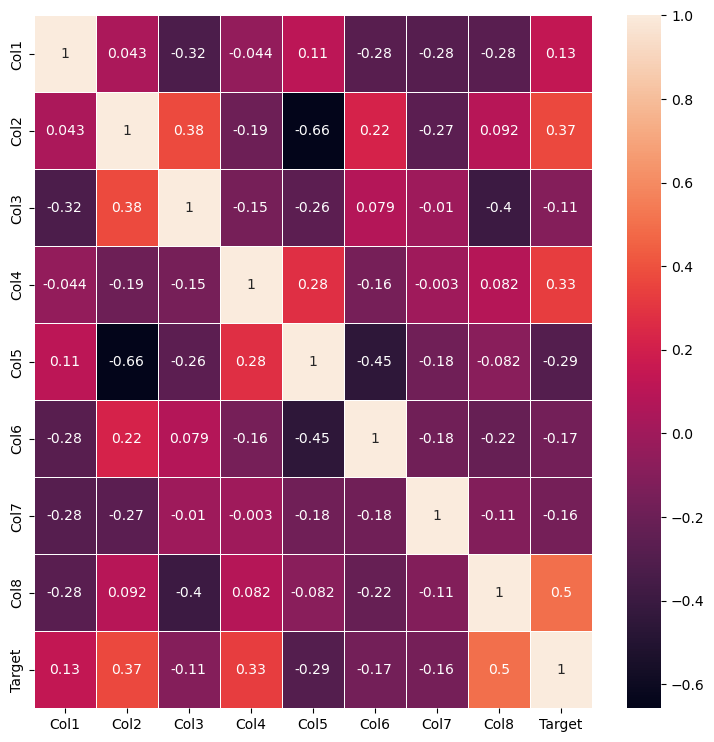

In [7]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(9,9))
sb.heatmap(df.corr(), linewidth = 0.5, annot=True)

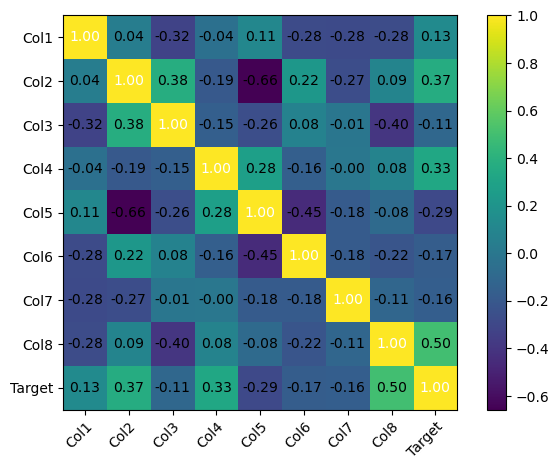

In [8]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

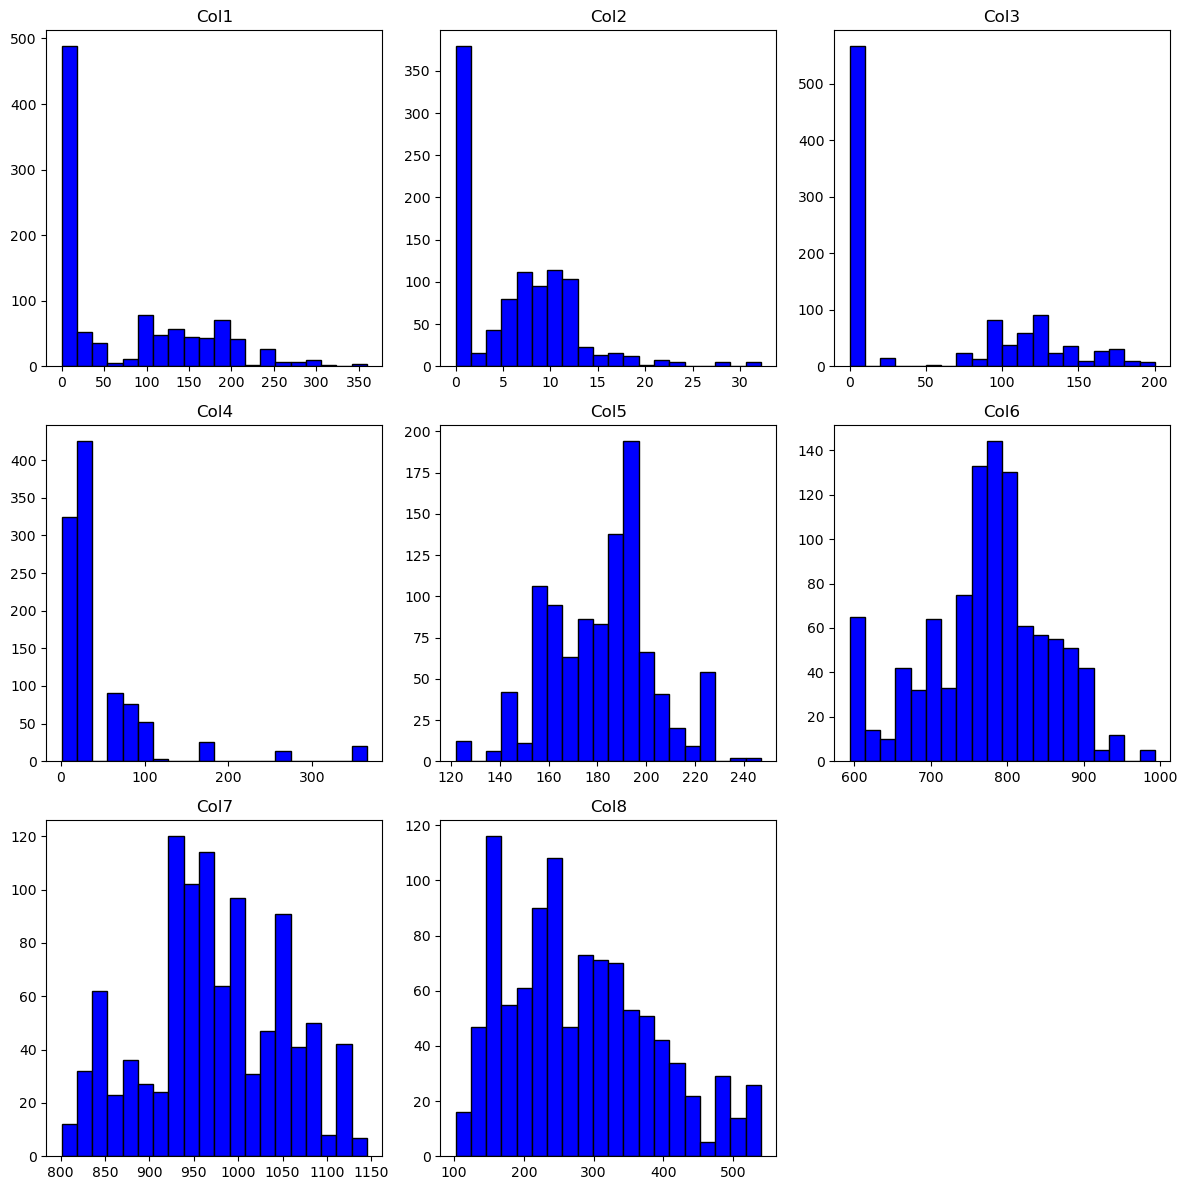

In [9]:
columns = dataset_regression_anonymized.columns
fig = plt.figure(figsize=(12,12))
for i in range(0,8):
  ax = plt.subplot(3,3,i+1)
  ax.hist(dataset_regression_anonymized[columns[i]],bins = 20, color='blue', edgecolor='black')
  ax.set_title(dataset_regression_anonymized.head(0)[columns[i]].name)
plt.tight_layout()
plt.show()

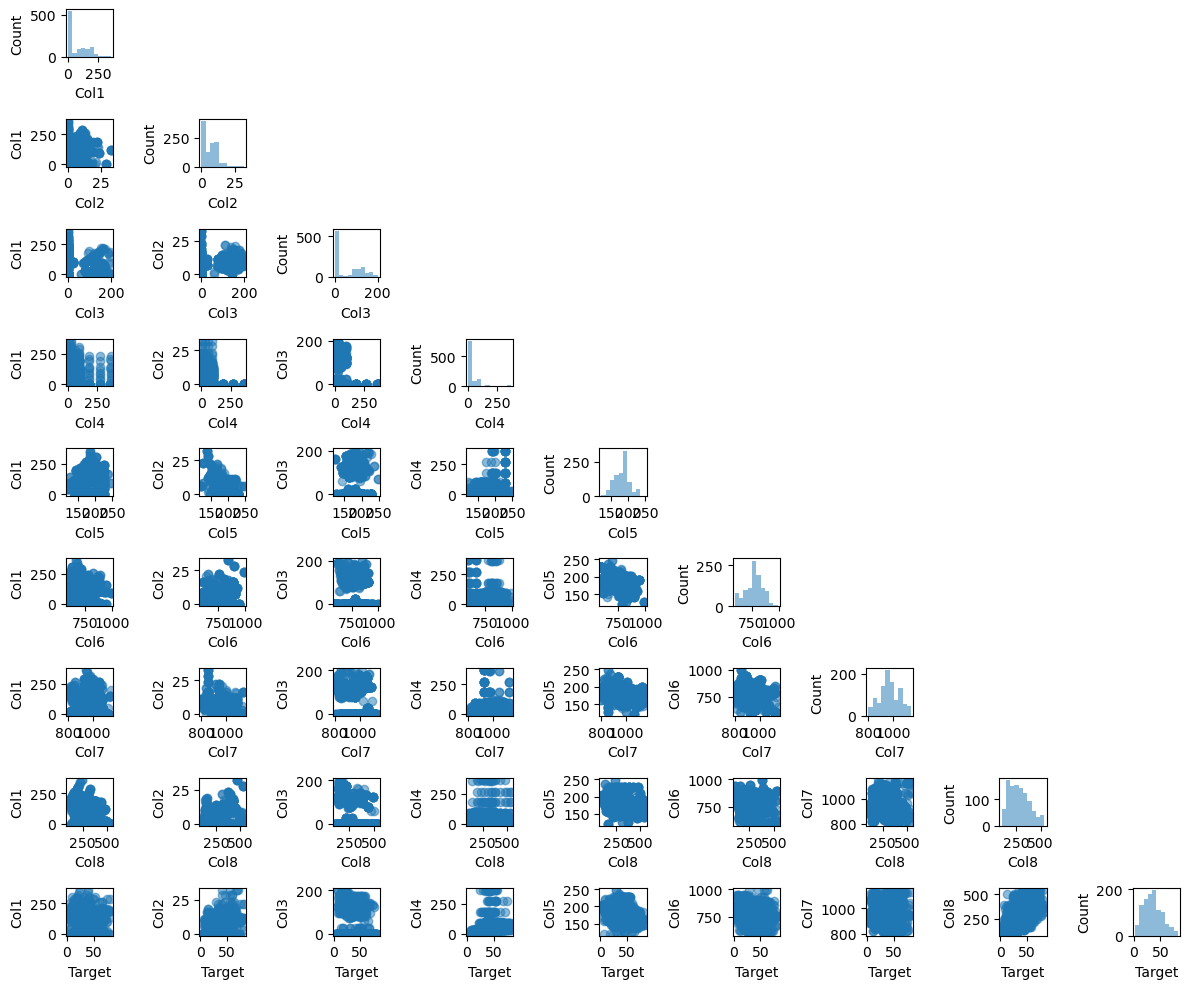

In [10]:
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

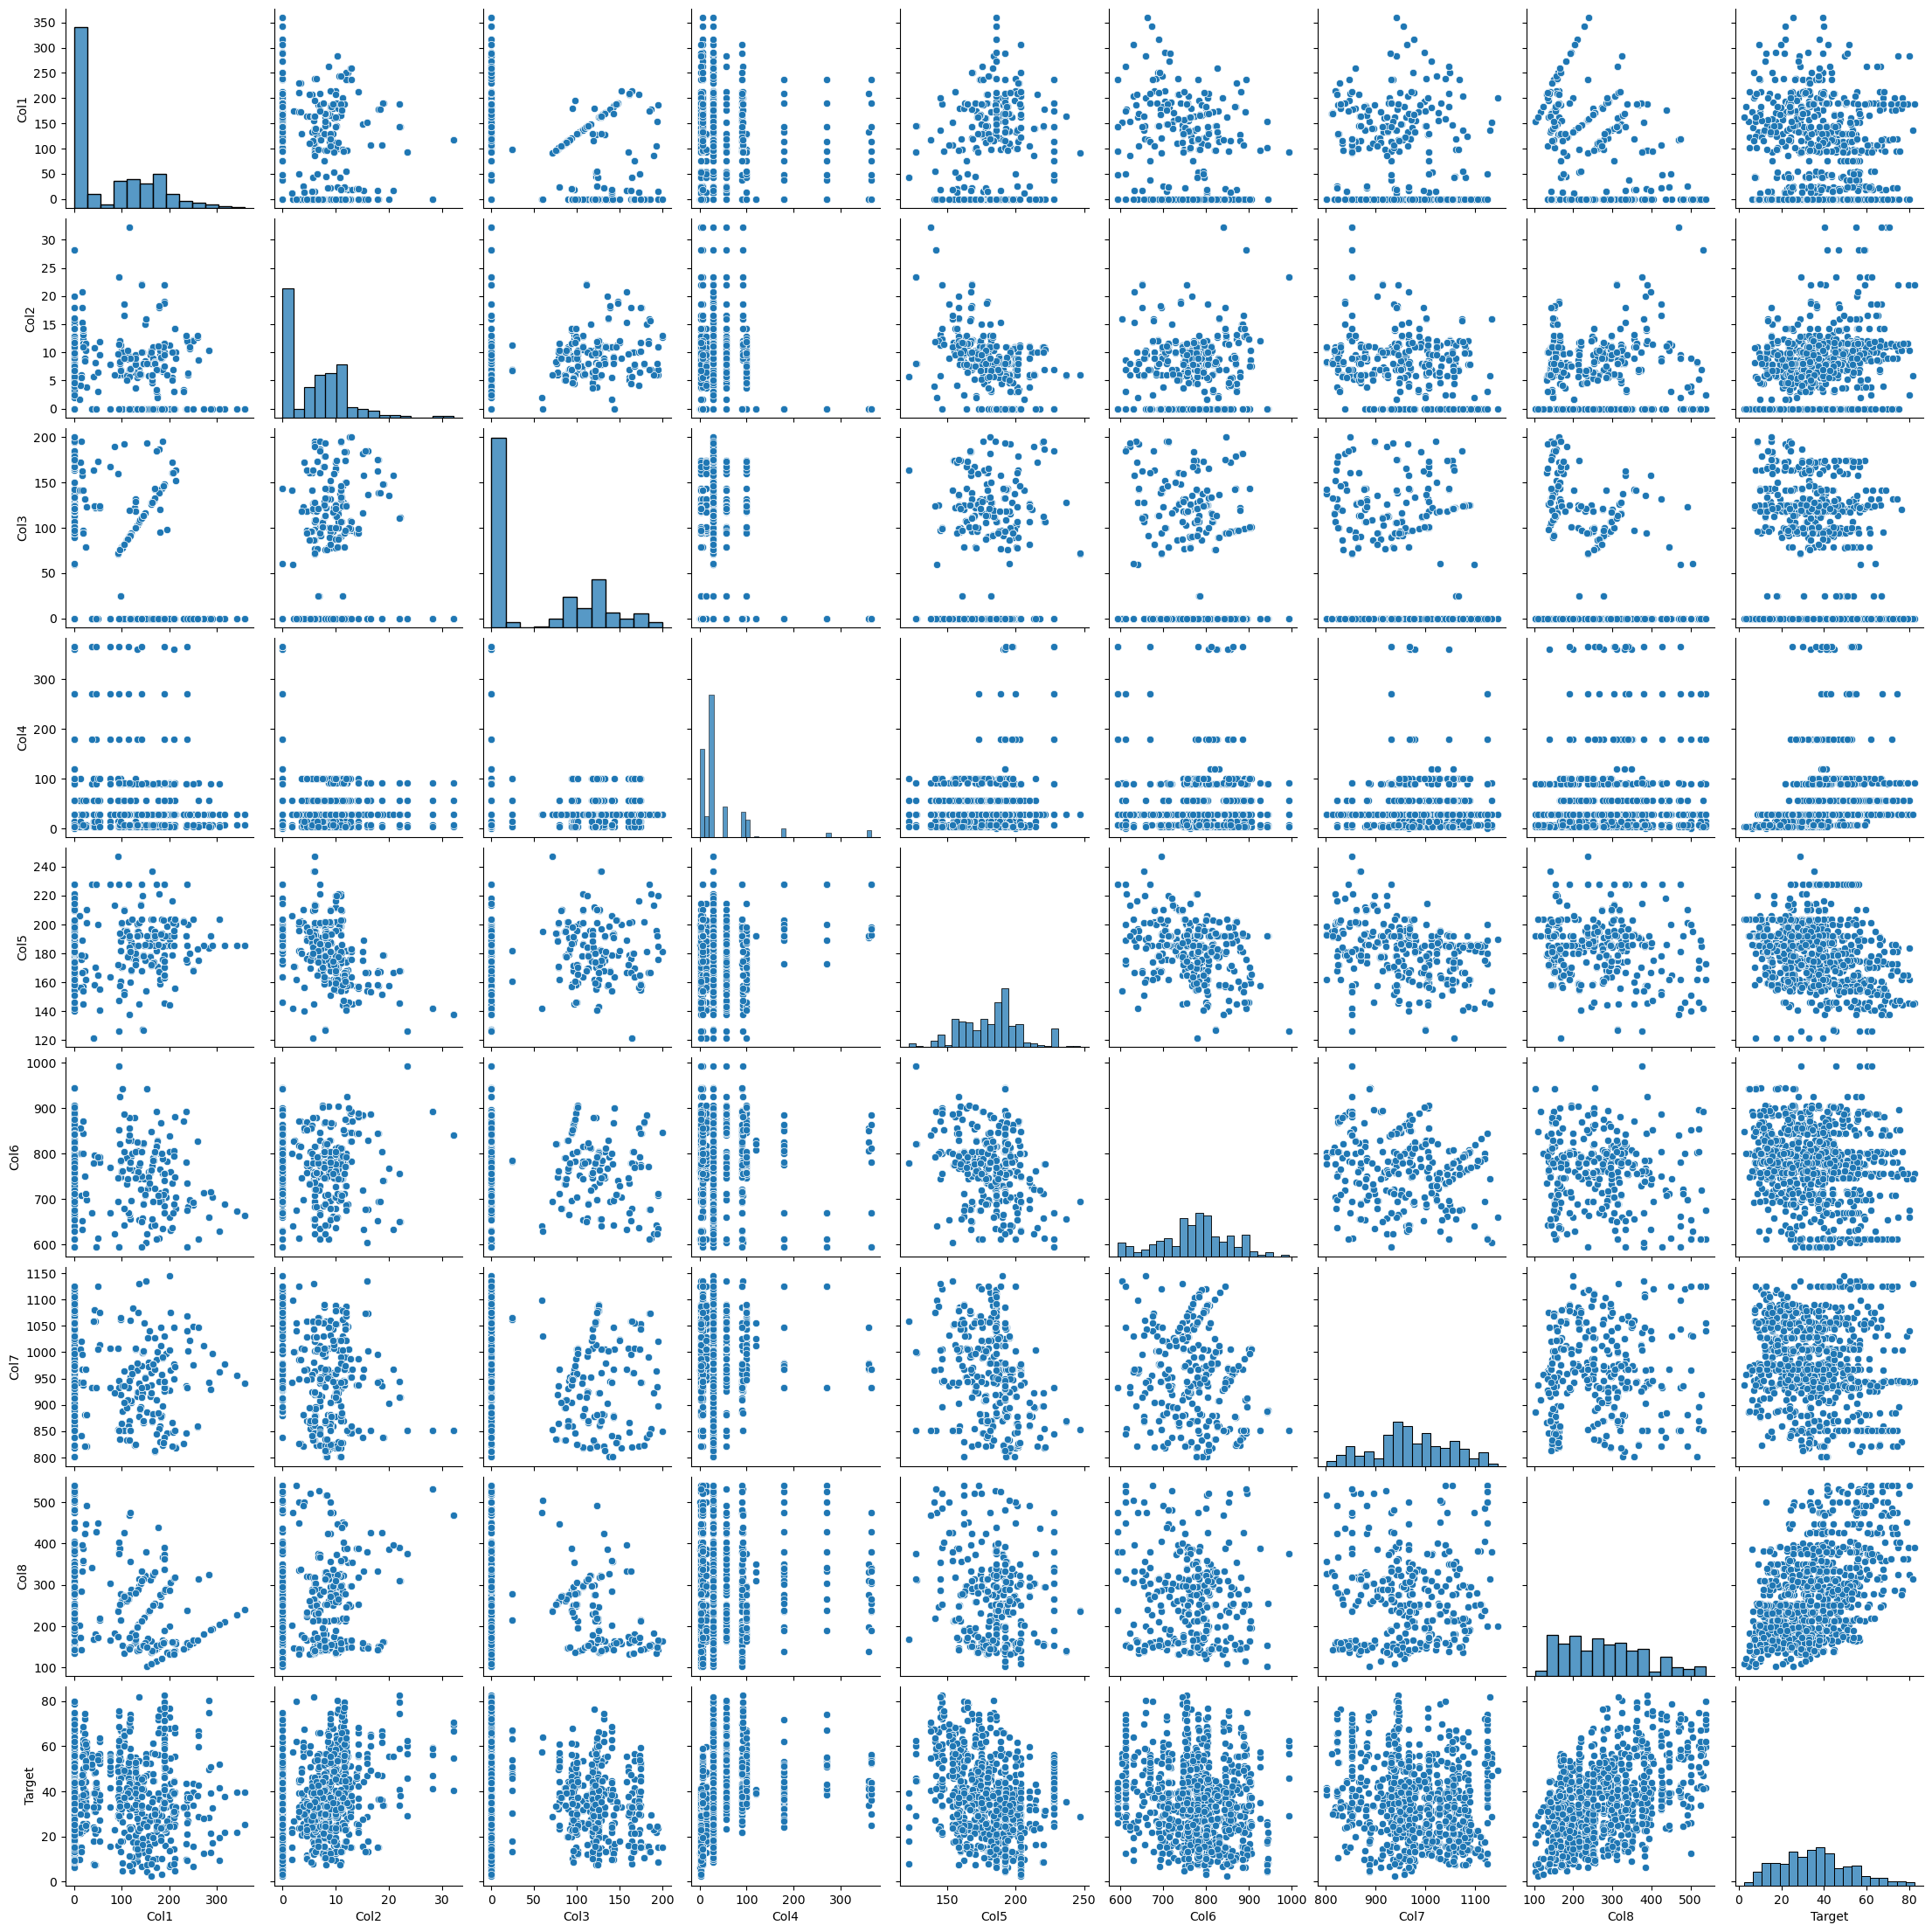

In [11]:
import seaborn as sb
sb.pairplot(df)
plt.show()

---

## Convertir Jupyter Notebook a Fichero Python

### Script en el Directorio Actual

In [12]:
! python .convert_notebook_to_script.py --input answer4.ipynb --output answer4.py

[NbConvertApp] Converting notebook answer4.ipynb to script
[NbConvertApp] Writing 3209 bytes to answer4.py


### Script en el Directorio Padre

In [13]:
! python ../.convert_notebook_to_script.py --input answer4.ipynb --output answer4.py

[NbConvertApp] Converting notebook answer4.ipynb to script
[NbConvertApp] Writing 3209 bytes to answer4.py
